In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./letterto shareholders1/*智冠*.txt")
    return files
textfile=textfile()
textfile

['./letterto shareholders1\\2013智冠致股東.txt',
 './letterto shareholders1\\2014智冠致股東.txt',
 './letterto shareholders1\\2015智冠致股東.txt',
 './letterto shareholders1\\2016智冠致股東.txt',
 './letterto shareholders1\\2017智冠致股東.txt']

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 2.136 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stopwords = ['107','2017',':','2018','2035','到','為主','都','面對','／','尤其','企業','影響','機電','原物','產品','主要','同時','加上','柒萬元','同期','逐步','四年','億陸仟','六年','五年','受到','另外','貨幣','進行','三年','單位','汽車','紙業','作業','目前','公司','年度','隨著','各位','方面','台北市','萬元','濕紙','市場','本期','士林','衡量','伍拾','鋼材','馬達','仟元','台幣','拋光','稅後','萬元','馬達','107','2017',':','2018','2035','電廠','出租','內容','延伸','推出','分別','五年','行情','品牌','使用','突破','媒體','取得','兩岸','美元','生活','今年','元月','逐漸','領域','內容','成果','月份','推出','費用','取得','資訊','原料','一年','包含','春節','每桶','巴西','情資','用戶','前年','全力','建立','認證','流量','會員','去年','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','商城','吳玉堂','中國國','半導體','官學','雲端','抗菌','美洲','病毒','卡亦持續','億柒仟','不動產處','機構','內政部','冰箱','智能化','半導體','公寓','飲品','旅館','韓國','以上','街上','文青','浪潮','故事','服務據點','椰子','機械','太陽能','美術','都市','創意','失業率','市府','安全','審議','土地','位廣告','仟元','年產','減排','智能','能效','自動化','工程','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','以上','太陽能','美術','位廣告','仟元','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化']
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [5]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['壹 致股 東報 告書 非常 感謝 股東 在 百忙之中 蒞臨 參加本 民國 年股 東常會 本 端賴 全體員工 戮力 以 赴 及 客戶 供 應商 之 鼎力支持 合 併 營收 創下 歷史 新高 合 併 稅後淨利 元 於 內容產品 之 通路 行銷 經營 點數 儲值 及 銷售 兩大 並經銷 各類 包 點數 卡 點數 儲值 介接 種類 多 達千種 內 各家 子公司 所營 運之遊 其他 廠商 及 服務業者 銷售 除銷售 外 基 於 傳統 門市 通路 優勢 也 銷售 票券 及 民生 消費品 滿足 消費者 各 式 需求 除本業 經銷 通路 穩健 轉投資 事業體 專注 於 營運 遊 戲研發 中華 網龍 於 年處 於 調整 轉型 全新 四大名捕 及 既有 金庸群 俠傳 及 女神 全新 網頁 烽火 鬥將魂 橫掃 天下 及手 機遊戲 吞食天地 中華 繁中版 落櫻 散華抄 我 是 智樂堂 大霹靂 國際 於 首款 以霹靂 布袋 戲為 主題 線 上 霹靂 神州 一 上市 就 廣大 高度 青 睞 營運 新 專注 於 大型 主 傭兵 天下 月影 傳說 女皇 之刃 俠盜 特攻 新龍 之谷 及 聯合 營運 聖鬥士星 矢 六款 子公司 競網 國際則 運動 競技類 型 智凡迪 保持 穩定 關 係 營運 之 魔獸 世界 遊 戲自 年底 以 版本 潘達利亞 之 謎 圍城 奧格瑪 營運 也 經銷 星海 爭霸 暗黑 破壞 神 星海 爭霸 蟲族 之心 新資料 片 亦 於 上市 在 此 感謝 全體 同仁 努力 不懈 及 股東 董監事 全力支持 信任 茲將 經 營結果 及 營運 展望 報告 如下 一 營業 報告 一 營業 計劃 實施 本 決算書表業 經勤業 眾信 聯合會 計師 事務 所 查核 完竣 合 併 營收 淨額 新台幣 合 併 稅後純益 新 每股 稅後盈餘為 元 二 預算 執行 情形 本 並未 出具 財務 預測 故無 預算 執行 情形 三 財務 收支 及 獲利 能力 分析 財務 收支 情形 新台幣 千元 項 目 增 減 金 額 增 減 營業 收入 營業 毛利 營業 營業 淨利 稅前 淨利 淨利 獲利 能力 分析 項 目 資產 報酬 率 股東 權益 報酬 率 佔實 收資本 比率 營業 淨利 稅前 淨利 純益率 每股 盈餘 元 註 四 研究 狀況 一直 專注 於 量產 自 製 遊 戲 並積極 投入 音樂 音效 製 作

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [6]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  1314


In [7]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (5, 1314)


<5x1314 sparse matrix of type '<class 'numpy.float64'>'
	with 2790 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [8]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
中華 0.05140374375002494 0 55
全新 0.05140374375002494 0 169
各類 0.07675503838196084 0 300
因應 0.0731483740912178 0 343
執行 0.07675503838196084 0 371
天下 0.07675503838196084 0 413
子公司 0.05486128056841335 0 425
專注 0.05486128056841335 0 477
帶領 0.07675503838196084 0 511
廠商 0.06192548167754479 0 519
情形 0.05486128056841335 0 543
成熟 0.07675503838196084 0 557
投入 0.09143546761402224 0 600
提升 0.1097225611368267 0 623
擴展 0.09143546761402224 0 636
收入 0.1097225611368267 0 641
效益 0.07675503838196084 0 658
新版 0.09288822251631718 0 671
既有 0.0731483740912178 0 686
星海 0.05140374375002494 0 689
更將 0.07675503838196084 0 707
業者 0.0864848995324752 0 756
淨利 0.1918875959549021 0 802
滿足 0.05486128056841335 0 814
營業 0.18287093522804448 0 837
營運 0.23773221579645784 0 842
爭霸 0.05140374375002494 0 851
獲利 0.07675503838196084 0 864
環境 0.18287093522804448 0 871
種類 0.07675503838196084 0 956
競爭 0.09143546761402224 0 970
競爭力 0.07675503838196084 0 971
策略 0.11513255757294125 0 980
範圍 0.06192548167754479 0 983


跨國網 0.07250980228799855 4 1123
運用 0.06127613670248997 4 1184
選擇 0.0518269639510334 4 1193
銷服務 0.0728409894923571 4 1223
門市 0.09712131932314279 4 1228
關注 0.05850045192711609 4 1238
雙軌 0.07250980228799855 4 1261
需求 0.12092958255241126 4 1269
體驗 0.07250980228799855 4 1302


### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [9]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./letterto shareholders1\2013智冠致股東.txt,./letterto shareholders1\2014智冠致股東.txt,./letterto shareholders1\2015智冠致股東.txt,./letterto shareholders1\2016智冠致股東.txt,./letterto shareholders1\2017智冠致股東.txt
0,一元,0.000000,0.000000,0.000000,0.033959,0.000000
1,一枝,0.030963,0.033249,0.000000,0.000000,0.000000
2,一步,0.000000,0.033249,0.031741,0.000000,0.000000
3,一直,0.018287,0.019637,0.018747,0.016182,0.017276
4,三國人,0.000000,0.000000,0.000000,0.033959,0.000000
5,三國志,0.000000,0.000000,0.000000,0.033959,0.000000
6,三大網,0.000000,0.000000,0.000000,0.054796,0.058500
7,三方,0.000000,0.000000,0.000000,0.101877,0.000000
8,上中下游,0.000000,0.000000,0.026348,0.022743,0.024280
9,上市,0.043242,0.023218,0.066494,0.038264,0.000000


In [10]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./letterto shareholders1\2013智冠致股東.txt,./letterto shareholders1\2014智冠致股東.txt,./letterto shareholders1\2015智冠致股東.txt,./letterto shareholders1\2016智冠致股東.txt,./letterto shareholders1\2017智冠致股東.txt
0,一元,0.000000,0.000000,0.000000,0.033959,0.000000
1,一枝,0.030963,0.033249,0.000000,0.000000,0.000000
2,一步,0.000000,0.033249,0.031741,0.000000,0.000000
3,一直,0.018287,0.019637,0.018747,0.016182,0.017276
4,三國人,0.000000,0.000000,0.000000,0.033959,0.000000
5,三國志,0.000000,0.000000,0.000000,0.033959,0.000000
6,三大網,0.000000,0.000000,0.000000,0.054796,0.058500
7,三方,0.000000,0.000000,0.000000,0.101877,0.000000
8,上中下游,0.000000,0.000000,0.026348,0.022743,0.024280
9,上市,0.043242,0.023218,0.066494,0.038264,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [11]:
writer = pd.ExcelWriter('tfidf.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [12]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.03096274, 0.        , ..., 0.03837752, 0.        ,
        0.02162122],
       [0.        , 0.03324916, 0.03324916, ..., 0.        , 0.        ,
        0.04643565],
       [0.        , 0.        , 0.03174104, ..., 0.        , 0.02634793,
        0.04432943],
       [0.03395914, 0.        , 0.        , ..., 0.        , 0.04548566,
        0.03826397],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02428033,
        0.        ]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [13]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一元,0,0,0,1,0
1,一枝,1,1,0,0,0
2,一步,0,1,1,0,0
3,一直,1,1,1,1,1
4,三國人,0,0,0,1,0
5,三國志,0,0,0,1,0
6,三大網,0,0,0,2,2
7,三方,0,0,0,3,0
8,上中下游,0,0,1,1,1
9,上市,2,1,3,2,0


In [14]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一元,0,0,0,1,0
1,一枝,1,1,0,0,0
2,一步,0,1,1,0,0
3,一直,1,1,1,1,1
4,三國人,0,0,0,1,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [15]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一元,0,0,0,1,0
1,一枝,1,1,0,0,0
2,一步,0,1,1,0,0
3,一直,1,1,1,1,1
4,三國人,0,0,0,1,0
5,三國志,0,0,0,1,0
6,三大網,0,0,0,2,2
7,三方,0,0,0,3,0
8,上中下游,0,0,1,1,1
9,上市,2,1,3,2,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [16]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [17]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一元': 1,
 '一枝': 2,
 '一步': 2,
 '一直': 5,
 '三國人': 1,
 '三國志': 1,
 '三大網': 4,
 '三方': 3,
 '上中下游': 3,
 '上市': 8,
 '上架': 1,
 '上班族': 1,
 '上述': 4,
 '上遊': 6,
 '上遊戲': 1,
 '下推': 1,
 '下遊': 3,
 '不懈': 1,
 '不斷': 1,
 '世代': 1,
 '世界': 5,
 '世界各地': 1,
 '並代': 2,
 '並優化': 1,
 '並同時': 1,
 '並密': 1,
 '並將': 5,
 '並已': 1,
 '並成': 1,
 '並持續': 7,
 '並擁': 1,
 '並擴': 6,
 '並於月': 1,
 '並於門': 1,
 '並有': 1,
 '並未': 5,
 '並爭': 1,
 '並積極': 7,
 '並經銷': 3,
 '並與': 3,
 '並著力': 1,
 '並著重': 1,
 '並觀測': 5,
 '並跨': 2,
 '並透過': 5,
 '並進': 1,
 '並開啟': 1,
 '並開放': 1,
 '並鼓': 2,
 '中國': 1,
 '中國及': 12,
 '中國研': 1,
 '中心': 4,
 '中站': 1,
 '中能': 1,
 '中華': 5,
 '中華職': 1,
 '主在': 1,
 '主管': 5,
 '主題': 1,
 '之光': 1,
 '之刃': 2,
 '之團隊': 1,
 '之外': 10,
 '之子': 1,
 '之心': 2,
 '之法規': 5,
 '之產品': 4,
 '之用': 1,
 '之策': 5,
 '之統': 5,
 '之經': 1,
 '之谷': 3,
 '之通': 3,
 '之遊': 2,
 '之霸': 1,
 '之魂': 1,
 '也將': 4,
 '事務': 5,
 '事業雙': 1,
 '事業體': 4,
 '互動': 4,
 '亞洲': 5,
 '亦可': 2,
 '亦將': 2,
 '人化': 1,
 '人及': 1,
 '人口': 2,
 '人氣': 2,
 '介接': 8,
 '介面': 1,
 '仍持續': 2,
 '仍為': 1,
 '仍然': 5,
 '付款': 4,
 '付產業': 1,
 '付電子'

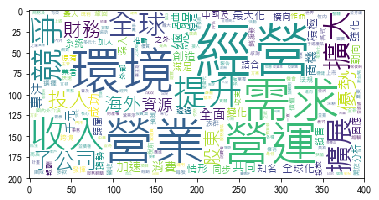

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [19]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:30]

[('經營', 58),
 ('環境', 45),
 ('營業', 43),
 ('需求', 40),
 ('營運', 37),
 ('收入', 36),
 ('提升', 34),
 ('競爭', 34),
 ('擴大', 25),
 ('全球', 24),
 ('擴展', 23),
 ('子公司', 22),
 ('優勢', 21),
 ('投入', 21),
 ('總體', 20),
 ('財務', 20),
 ('海外', 19),
 ('股東', 19),
 ('資源', 19),
 ('全面', 18),
 ('專注', 18),
 ('消費', 18),
 ('加速', 17),
 ('商機', 17),
 ('成功', 17),
 ('共同', 16),
 ('創造', 16),
 ('積極', 16),
 ('千元', 15),
 ('情形', 15)]

In [20]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0xfef8fd0>,
 <a list of 10 Text xticklabel objects>)

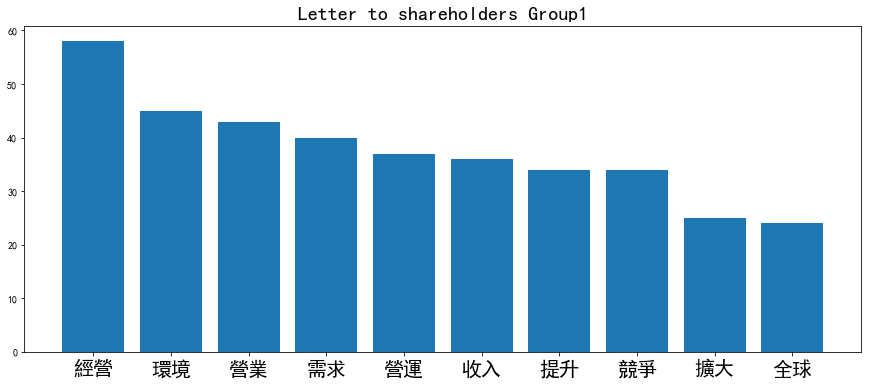

In [21]:
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("Letter to shareholders Group1",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

In [22]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[ 0.72480605, -0.19008768],
       [ 0.0393484 ,  0.44493376],
       [-0.16860257,  0.33847641],
       [-0.29337508, -0.2216651 ],
       [-0.3021768 , -0.3716574 ]])

No handles with labels found to put in legend.


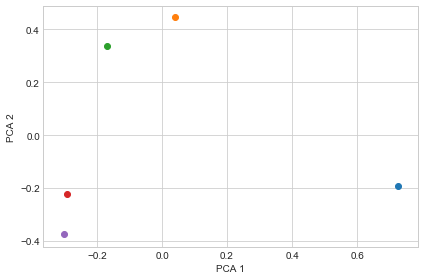

In [23]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

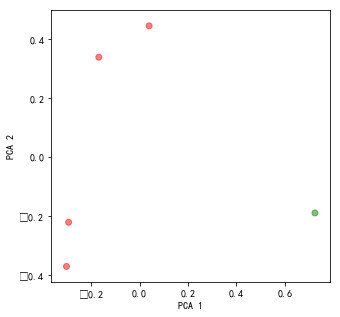

In [26]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (5,5))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()